# Interpretation

## Purpose

How to interpret clustering models

# Data
I  have a dataset called marketing_campaign.csv about supermarket customers

	•	ID — unique customer identifier.
	•	Year_Birth — the year the customer was born.
	•	Dt_Customer — the date the customer registered on the website.
	•	Recency — the number of days since the customer’s last purchase.
	•	MntFruits — the amount spent on fruits in the last two years.
	•	MntMeatProducts — the amount spent on meat in the last two years.
	•	MntFishProducts — the amount spent on fish in the last two years.
	•	MntSweetProducts — the amount spent on sweets in the last two years.
	•	NumWebPurchases — the number of purchases made through the website.
	•	NumStorePurchases — the number of purchases made directly in stores.
	•	Response: 1 if the customer participated in the last marketing campaign, 0 otherwise.

We will solve the clustering task for customers in order to plan marketing campaigns for each customer group.

# 1

Load the dataset and perform exploratory data analysis.

In [38]:
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [39]:
 import pandas as pd
df = pd.read_csv('marketing campaign.csv')
df.head()

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0


In [40]:
df.shape

(2240, 11)

In [41]:
df.describe()

,ID,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,49.109375,26.302232,166.950000,37.525446,27.062946,4.084821,5.790179,0.149107
std,3246.662198,11.984069,28.962453,39.773434,225.715373,54.628979,41.280498,2.778714,3.250958,0.356274
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,24.000000,1.000000,16.000000,3.000000,1.000000,2.000000,3.000000,0.000000
50%,5458.500000,1970.000000,49.000000,8.000000,67.000000,12.000000,8.000000,4.000000,5.000000,0.000000
75%,8427.750000,1977.000000,74.000000,33.000000,232.000000,50.000000,33.000000,6.000000,8.000000,0.000000
max,11191.000000,1996.000000,99.000000,199.000000,1725.000000,259.000000,263.000000,27.000000,13.000000,1.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Dt_Customer        2240 non-null   object
 3   Recency            2240 non-null   int64 
 4   MntFruits          2240 non-null   int64 
 5   MntMeatProducts    2240 non-null   int64 
 6   MntFishProducts    2240 non-null   int64 
 7   MntSweetProducts   2240 non-null   int64 
 8   NumWebPurchases    2240 non-null   int64 
 9   NumStorePurchases  2240 non-null   int64 
 10  Response           2240 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 192.6+ KB


<Axes: xlabel='NumWebPurchases', ylabel='NumStorePurchases'>

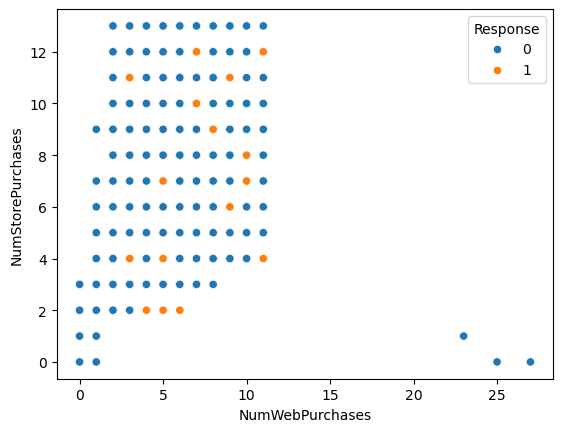

In [43]:
sns.scatterplot(x = df['NumWebPurchases'], y = df['NumStorePurchases'], hue=df['Response'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Dt_Customer        2240 non-null   object
 3   Recency            2240 non-null   int64 
 4   MntFruits          2240 non-null   int64 
 5   MntMeatProducts    2240 non-null   int64 
 6   MntFishProducts    2240 non-null   int64 
 7   MntSweetProducts   2240 non-null   int64 
 8   NumWebPurchases    2240 non-null   int64 
 9   NumStorePurchases  2240 non-null   int64 
 10  Response           2240 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 192.6+ KB


# 2

Perform data cleaning and preparation for further use in building machine learning models.

In [45]:
df = df[df['Year_Birth']> 1920]

In [46]:
df = df[df['MntMeatProducts'] < 1500]

In [47]:
df['Entire_Purchase'] = df.apply(lambda x: x['MntFruits'] + x['MntMeatProducts'] + x['MntFishProducts'] + x['MntSweetProducts'], axis = 1 )
#df['Month_dt'] = df['Dt_Customer'].apply(lambda x: int(x.split('-')[1]))
df['Year_dt'] = df['Dt_Customer'].apply(lambda x: int(x.split('-')[2]))
df['Num_all_Purchase'] = df.apply(lambda x: x['NumWebPurchases'] + x['NumStorePurchases'], axis = 1)

In [48]:
df.drop(columns=['ID', 'Dt_Customer'],inplace=True)

In [49]:
df.drop(columns=['MntFruits', 'MntMeatProducts', 'MntFishProducts',	'MntSweetProducts'], inplace = True)

In [50]:
df

,Year_Birth,Recency,NumWebPurchases,NumStorePurchases,Response,Entire_Purchase,Year_dt,Num_all_Purchase
0,1957,58,8,4,1,894,2012,12
1,1954,38,1,2,0,10,2014,3
2,1965,26,8,10,0,308,2013,18
3,1984,26,2,4,0,37,2014,6
4,1981,94,5,6,0,234,2014,11
...,...,...,...,...,...,...,...,...
2235,1967,46,9,4,0,385,2013,13
2236,1946,56,8,5,0,30,2014,13
2237,1981,91,2,13,0,309,2014,15
2238,1956,8,6,10,0,354,2014,16


# 3

Build a clustering model using the k-means method. Determine the optimal number of clusters using the elbow method and silhouette score metric.

<Axes: >

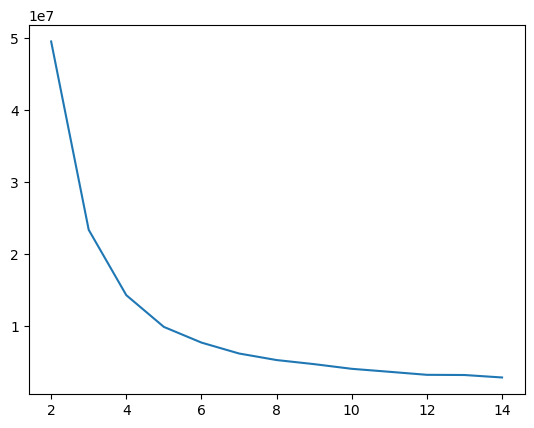

In [51]:
clusters = list(range(2,15))
metrics = []
metrics_inetria = []
for i in clusters:
    knn = KMeans(n_clusters = i).fit(df)
    score = silhouette_score(df, knn.labels_)    
    metrics_inetria.append(knn.inertia_)
    metrics.append(score)
sns.lineplot(x=clusters, y=metrics_inetria)

<Axes: >

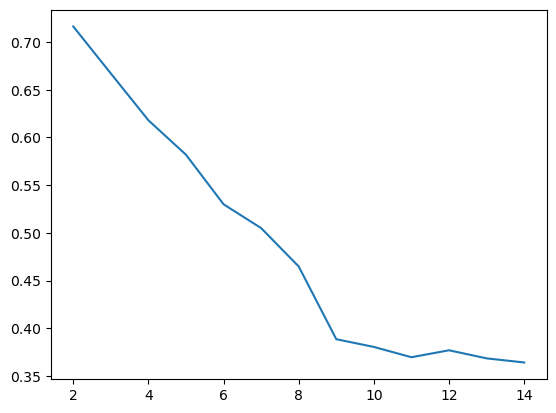

In [52]:
sns.lineplot(x=clusters, y=metrics)

In [64]:
knn = KMeans(n_clusters=3).fit(df)

# 4 

To visualize the clustering results on a 2D plot using the t-SNE method

In [66]:
tsne = TSNE(n_components=2,perplexity=100)
df_emb = tsne.fit_transform(df)
data = pd.DataFrame(df_emb)

In [67]:
data

,0,1
0,53.588482,1.026266
1,-34.876312,-3.912773
2,14.804463,-3.052253
3,-23.913563,-6.288794
4,7.666508,-0.065167
...,...,...
2227,20.796001,-0.206281
2228,-21.933912,4.108070
2229,14.115885,0.656660
2230,18.600986,-2.838516


<Axes: xlabel='0', ylabel='1'>

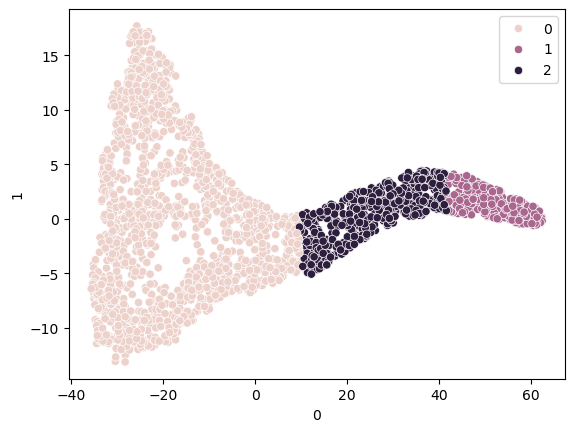

In [68]:
sns.scatterplot(x=data[0],y=data[1],hue=knn.labels_)

# 5

Build the profiles of the clusters and describe them.

In [69]:
centroids = knn.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df.columns)
centroids_df

,Year_Birth,Recency,NumWebPurchases,NumStorePurchases,Response,Entire_Purchase,Year_dt,Num_all_Purchase
0,1969.596851,49.129363,3.274470,4.364819,0.102669,65.924025,2013.061602,7.639288
1,1969.194444,50.152778,5.093750,8.291667,0.326389,895.256944,2012.986111,13.385417
2,1966.532091,48.443064,5.987578,8.685300,0.186335,443.430642,2012.952381,14.672878


# 6

Visualize the profiles of the clusters. Prepare a brief summary of the results of your analysis for the client.

1. The first group consists of inactive customers. They make few purchases and do not respond to advertising.
2. The second group consists of active customers. They respond to advertising more frequently than other groups and are the most affluent.
3. They make frequent purchases but are not as strongly engaged with advertising.

<Axes: ylabel='Entire_Purchase'>

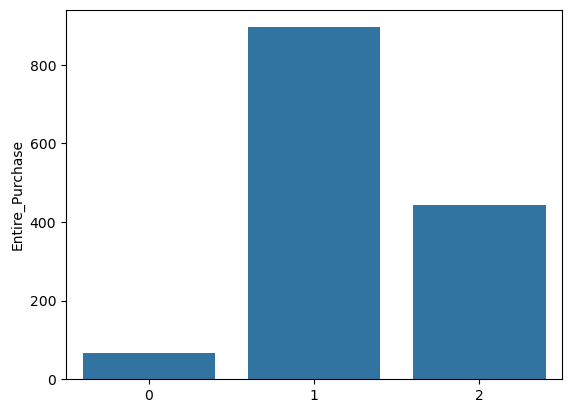

In [72]:
sns.barplot(x = [0,1,2] , y = centroids_df['Entire_Purchase'])